In [2]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


12749.11845703125
12757.904296875
12757.904296875
12758.4873046875
12757.904296875
50222.412890625
50211.43515625
50211.43515625
50206.13828125
50211.43515625
68004.23984375
67999.06640625
67999.06640625
67998.2515625
67999.06640625
162973.00859375
160441.321875
192516.3015625
180756.0484375
262403.625
493575.95
500094.871875
543185.253125
542461.790625
626661.08125
1796228.25
1915732.2
2002825.1375
1993634.675
2144994.475
1068.258950805664
1082.520489501953
981.3078796386719
827.6633666992187
4972.775555419922
296939.640625
782051.496875
714476.64375
371800.79375
2124390.85
774249.5453125
3284898.6
2812749.7875
1679636.2890625
6763457.4


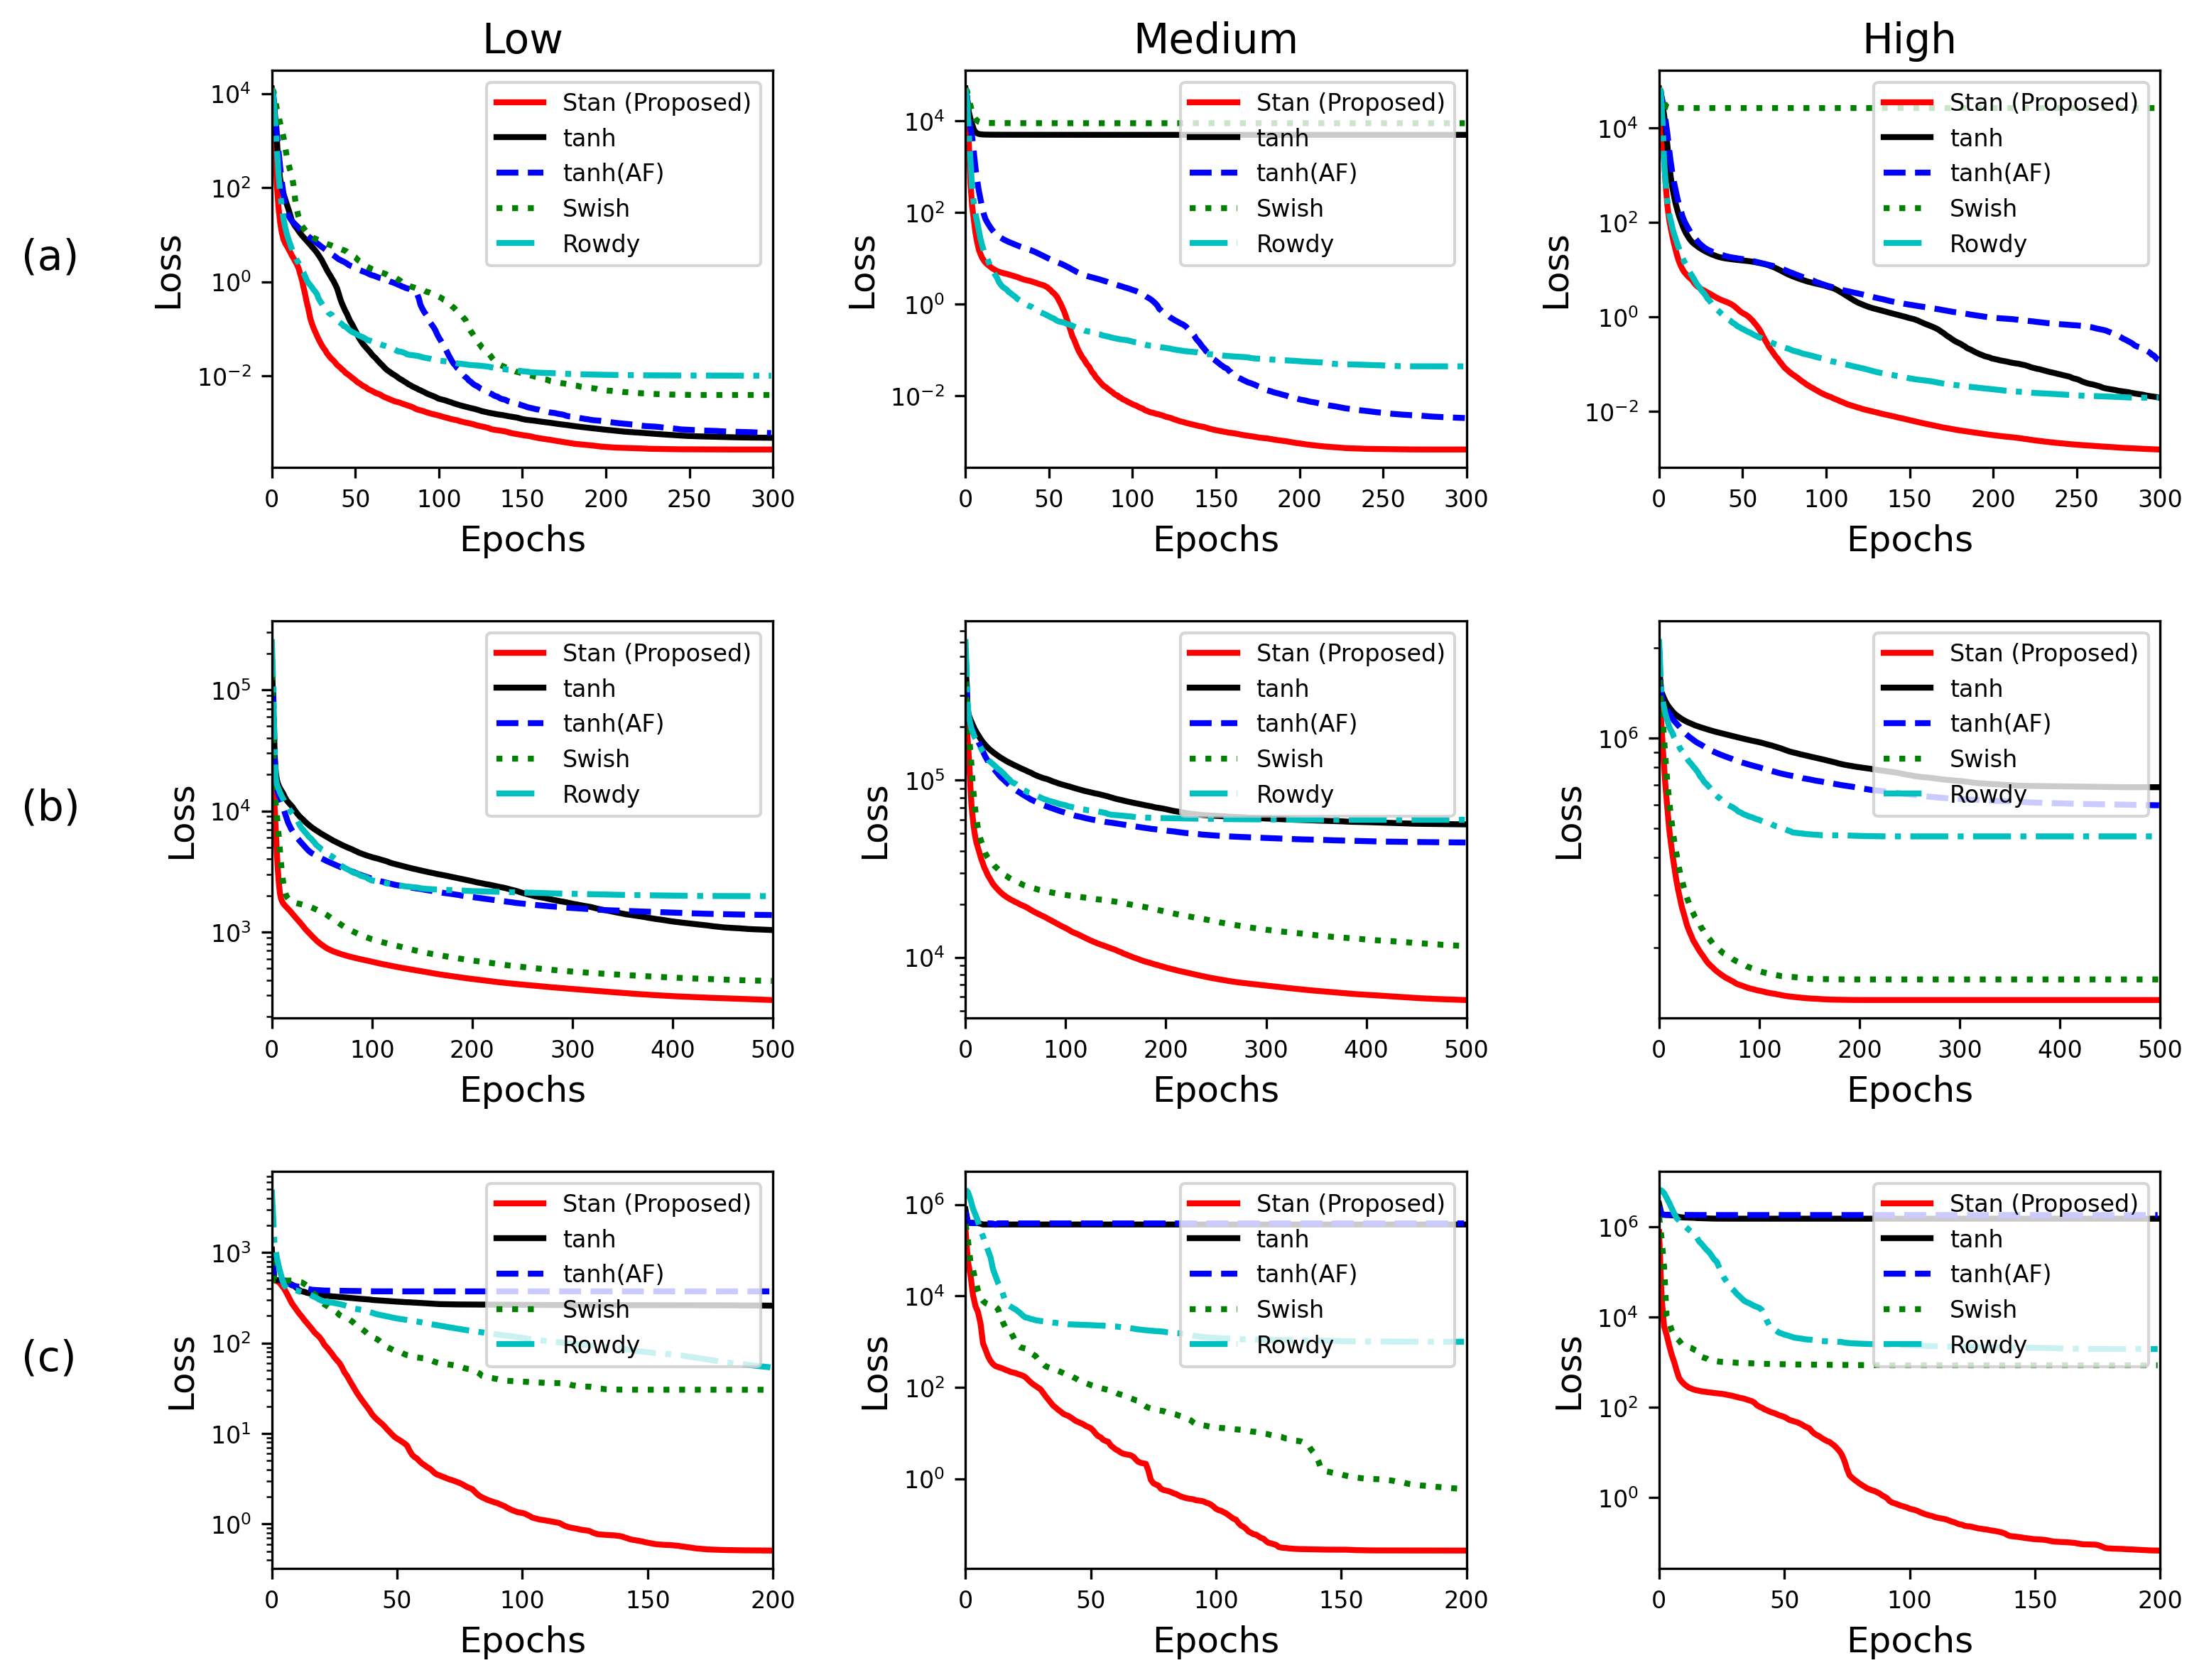

In [3]:
fig, axs = plt.subplots(3,3)
fig.dpi=300
fig.tight_layout()

prob_folder = './2D/Klein Gordon/'
prob_name = "KG_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 300
reps = 10

i = 0
ax = axs[0,:]

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,num_steps])
    i = i+1
    
#ax[0,0].set_title('Smooth Function',fontsize=18, math_fontfamily='cm')
# ax[0,0].set_title('Regression Problem',fontsize=18, math_fontfamily='cm')
# ax[0,1].set_title('First-order ODE',fontsize=18, math_fontfamily='cm')
# ax[0,2].set_title('Second-order ODE',fontsize=18, math_fontfamily='cm')

# plot_rows = ['(a)','(b)']

# for i in range(2):
#     ax[i,0].text(-0.5,0.5,plot_rows[i],fontsize=18,transform=ax[i,0].transAxes)


# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace =0.3, hspace=0.4)
# plt.savefig('1D_Loss_Beta.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './3D/HTTP/'
prob_name = "3D_HTTP_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 500
reps = 10
ax = axs[1,:]
i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,num_steps])
    i = i+1
    
#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './Inverse/Spring Mass/'
prob_name = "1D_SMD_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

ax = axs[2,:]
num_steps = 200
reps = 10

i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,8)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(np.linspace(0,num_steps-1,num_steps),mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,num_steps])
    i = i+1
    
plt_titles = ["Low","Medium","High"]   
for i in range(3):
    axs[0,i].set_title(plt_titles[i],fontsize=14, math_fontfamily='cm')    
    
plot_rows = ['(a)','(b)','(c)']

for i in range(3):
    axs[i,0].text(-0.5,0.5,plot_rows[i],fontsize=14,transform=axs[i,0].transAxes)
    
plt.savefig('Case_loss_train.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,3)
fig.dpi=300
fig.tight_layout()

prob_folder = './2D/Klein Gordon/'
prob_name = "KG_"
levels = ["low","medium","high"]
folder = 'stan/'
algo = 'stan'
color = 'r'
# labels= ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 300
reps = 10

i = 0
ax = axs[1,:]

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    
    data = scipy.io.loadmat(prob_folder + folder+ prob_name+algo_name + '_'+ level+'.mat')
    train_loss =  data['beta']

    mean_train_loss = np.zeros((num_steps,10))

    for k in range(reps):
        mean_train_loss[:,k] = train_loss[k][:num_steps]

    mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
    print(mean_train_loss[0])

    ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])

    j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,200])
    i = i+1
    
#ax[0,0].set_title('Smooth Function',fontsize=18, math_fontfamily='cm')
# ax[0,0].set_title('Regression Problem',fontsize=18, math_fontfamily='cm')
# ax[0,1].set_title('First-order ODE',fontsize=18, math_fontfamily='cm')
# ax[0,2].set_title('Second-order ODE',fontsize=18, math_fontfamily='cm')

# plot_rows = ['(a)','(b)']

# for i in range(2):
#     ax[i,0].text(-0.5,0.5,plot_rows[i],fontsize=18,transform=ax[i,0].transAxes)


# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace =0.3, hspace=0.4)
# plt.savefig('1D_Loss_Beta.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './3D/HTTP/'
prob_name = "3D_HTTP_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

num_steps = 500
reps = 10
ax = axs[2,:]
i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,2.5)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,200])
    i = i+1
    
#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------

prob_folder = './Inverse/Spring Mass/'
prob_name = "1D_SMD_"
levels = ["low","medium","high"]
folder_names = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']
colors = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

ax = axs[0,:]
num_steps = 200
reps = 10

i = 0

for level in levels:
    ax[i].figure.set_size_inches(10,8)
    j = 0
    
    for algo_name in algo_names:
        data = scipy.io.loadmat(prob_folder + folder_names[j]+ prob_name+algo_names[j] + '_'+ level+'.mat')
        train_loss =  data['train_loss']
        
        mean_train_loss = np.zeros((num_steps,10))

        for k in range(reps):
            mean_train_loss[:,k] = train_loss[k][:num_steps]
    
        mean_train_loss = np.nanmean(mean_train_loss,axis = 1)
        print(mean_train_loss[0])
        
        ax[i].plot(np.linspace(0,num_steps-1,num_steps),mean_train_loss,colors[j],linewidth = 2,label = labels[j])
        
        j = j+1


    ax[i].legend(prop={'size':8}, loc = 'upper right')
    # ax_loss.legend(prop={'size':6})
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    ax[i].set_ylabel('Loss',fontsize=12, math_fontfamily='cm')
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)
    ax[i].set_yscale('log')
    ax[i].set_xlim([0,num_steps])
    i = i+1
    
plt_titles = ["Low","Medium","High"]   
for i in range(3):
    axs[0,i].set_title(plt_titles[i],fontsize=14, math_fontfamily='cm')    
    
plot_rows = ['(a)','(b)','(c)']

for i in range(3):
    axs[i,0].text(-0.5,0.5,plot_rows[i],fontsize=14,transform=axs[i,0].transAxes)
    
plt.savefig('Case_loss_train.pdf', format='pdf',pad_inches=0, bbox_inches='tight')